In [1]:
# Select algorithm to use as machine learner
# 0 = Linear Regression
# 1 = SVR  (not recommended - too slow)
# 2 = Decision Tree
# 3 = Random Forest
# 4 = XGBoost

algorithm_choice = 0

In [3]:
import pandas as pd
from IPython.display import display # Allows the use of display() for DataFrames
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

pd.options.mode.chained_assignment = None  # default='warn'
pd.set_option('display.max_columns', 500)  # this is needed since the combined df has ~400 cols

print "Import successful"

Import successful


In [13]:
try:
    data  = pd.io.parsers.read_csv('./Data/train_lonlat_id_CS_0521_feature.csv')
    macro = pd.io.parsers.read_csv('./Data/macro_feature_CS_0521.csv')
    data  = data.merge(macro, on = 'timestamp', how = 'left')
    
    print "Russian housing training dataset has {} samples with {} features each.".format(*data.shape)
    
except:
    print "Dataset(s) could not be loaded. Please check filename is correct and dataset exists"

Russian housing training dataset has 30471 samples with 435 features each.


In [14]:
print "Display sample of training data:"
display(data.head())

Display sample of training data:


,0_13_all,0_13_female,0_13_male,0_17_all,0_17_female,0_17_male,0_6_all,0_6_female,0_6_male,16_29_all,16_29_female,16_29_male,7_14_all,7_14_female,7_14_male,ID_big_road1,ID_big_road2,ID_bus_terminal,ID_metro,ID_railroad_station_avto,ID_railroad_station_walk,ID_railroad_terminal,OKRUGS,additional_education_km,additional_education_raion,area_m,basketball_km,big_church_count_1000,big_church_count_1500,big_church_count_2000,big_church_count_3000,big_church_count_500,big_church_count_5000,big_church_km,big_market_km,big_market_raion,big_road1_1line,big_road1_km,big_road2_km,build_count_1921-1945,build_count_1946-1970,build_count_1971-1995,build_count_after_1995,build_count_before_1920,build_count_block,build_count_brick,build_count_foam,build_count_frame,build_count_mix,build_count_monolith,build_count_panel,build_count_slag,build_count_wood,build_year,bulvar_ring_km,bus_terminal_avto_km,cafe_avg_price_1000,cafe_avg_price_1500,cafe_avg_price_2000,cafe_avg_price_3000,cafe_avg_price_500,cafe_avg_price_5000,cafe_count_1000,cafe_count_1000_na_price,cafe_count_1000_price_1000,cafe_count_1000_price_1500,cafe_count_1000_price_2500,cafe_count_1000_price_4000,cafe_count_1000_price_500,cafe_count_1000_price_high,cafe_count_1500,cafe_count_1500_na_price,cafe_count_1500_price_1000,cafe_count_1500_price_1500,cafe_count_1500_price_2500,cafe_count_1500_price_4000,cafe_count_1500_price_500,cafe_count_1500_price_high,cafe_count_2000,cafe_count_2000_na_price,cafe_count_2000_price_1000,cafe_count_2000_price_1500,cafe_count_2000_price_2500,cafe_count_2000_price_4000,cafe_count_2000_price_500,cafe_count_2000_price_high,cafe_count_3000,cafe_count_3000_na_price,cafe_count_3000_price_1000,cafe_count_3000_price_1500,cafe_count_3000_price_2500,cafe_count_3000_price_4000,cafe_count_3000_price_500,cafe_count_3000_price_high,cafe_count_500,cafe_count_5000,cafe_count_5000_na_price,cafe_count_5000_price_1000,cafe_count_5000_price_1500,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_500,cafe_count_5000_price_high,cafe_count_500_na_price,cafe_count_500_price_1000,cafe_count_500_price_1500,cafe_count_500_price_2500,cafe_count_500_price_4000,cafe_count_500_price_500,cafe_count_500_price_high,cafe_sum_1000_max_price_avg,cafe_sum_1000_min_price_avg,cafe_sum_1500_max_price_avg,cafe_sum_1500_min_price_avg,cafe_sum_2000_max_price_avg,cafe_sum_2000_min_price_avg,cafe_sum_3000_max_price_avg,cafe_sum_3000_min_price_avg,cafe_sum_5000_max_price_avg,cafe_sum_5000_min_price_avg,cafe_sum_500_max_price_avg,cafe_sum_500_min_price_avg,catering_km,cemetery_km,children_preschool,children_school,church_count_1000,church_count_1500,church_count_2000,church_count_3000,church_count_500,church_count_5000,church_synagogue_km,culture_objects_top_25,culture_objects_top_25_raion,detention_facility_km,detention_facility_raion,ecology,ekder_all,ekder_female,ekder_male,exhibition_km,female_f,fitness_km,floor,full_all,full_sq,green_part_1000,green_part_1500,green_part_2000,green_part_3000,green_part_500,green_part_5000,green_zone_km,green_zone_part,healthcare_centers_raion,hospice_morgue_km,hospital_beds_raion,ice_rink_km,incineration_km,incineration_raion,indust_part,industrial_km,kindergarten_km,kitch_sq,kremlin_km,lat,leisure_count_1000,leisure_count_1500,leisure_count_2000,leisure_count_3000,leisure_count_500,leisure_count_5000,life_sq,log_price_doc,lon,male_f,market_count_1000,market_count_1500,market_count_2000,market_count_3000,market_count_500,market_count_5000,market_shop_km,material,max_floor,metro_km_avto,metro_km_walk,metro_min_avto,metro_min_walk,mkad_km,month_x,mosque_count_1000,mosque_count_1500,mosque_count_2000,mosque_count_3000,mosque_count_500,mosque_count_5000,mosque_km,museum_km,nuclear_reactor_km,nuclear_reactor_raion,num_room,office_count_1000,office_count_1500,office_count_2000,office_count_3000,office_count_500,office_count_5000,office_km,office_raion,office_sqm_1000,office_sqm_1500,office_sqm_2000,office_sqm_3000,office_sqm_500,office_sqm_5000,

In [15]:
print "Display statistics about training data:"
display(data.describe())


Display statistics about training data:


,0_13_all,0_13_female,0_13_male,0_17_all,0_17_female,0_17_male,0_6_all,0_6_female,0_6_male,16_29_all,16_29_female,16_29_male,7_14_all,7_14_female,7_14_male,ID_big_road1,ID_big_road2,ID_bus_terminal,ID_metro,ID_railroad_station_avto,ID_railroad_station_walk,ID_railroad_terminal,additional_education_km,additional_education_raion,area_m,basketball_km,big_church_count_1000,big_church_count_1500,big_church_count_2000,big_church_count_3000,big_church_count_500,big_church_count_5000,big_church_km,big_market_km,big_road1_km,big_road2_km,build_count_1921-1945,build_count_1946-1970,build_count_1971-1995,build_count_after_1995,build_count_before_1920,build_count_block,build_count_brick,build_count_foam,build_count_frame,build_count_mix,build_count_monolith,build_count_panel,build_count_slag,build_count_wood,build_year,bulvar_ring_km,bus_terminal_avto_km,cafe_avg_price_1000,cafe_avg_price_1500,cafe_avg_price_2000,cafe_avg_price_3000,cafe_avg_price_500,cafe_avg_price_5000,cafe_count_1000,cafe_count_1000_na_price,cafe_count_1000_price_1000,cafe_count_1000_price_1500,cafe_count_1000_price_2500,cafe_count_1000_price_4000,cafe_count_1000_price_500,cafe_count_1000_price_high,cafe_count_1500,cafe_count_1500_na_price,cafe_count_1500_price_1000,cafe_count_1500_price_1500,cafe_count_1500_price_2500,cafe_count_1500_price_4000,cafe_count_1500_price_500,cafe_count_1500_price_high,cafe_count_2000,cafe_count_2000_na_price,cafe_count_2000_price_1000,cafe_count_2000_price_1500,cafe_count_2000_price_2500,cafe_count_2000_price_4000,cafe_count_2000_price_500,cafe_count_2000_price_high,cafe_count_3000,cafe_count_3000_na_price,cafe_count_3000_price_1000,cafe_count_3000_price_1500,cafe_count_3000_price_2500,cafe_count_3000_price_4000,cafe_count_3000_price_500,cafe_count_3000_price_high,cafe_count_500,cafe_count_5000,cafe_count_5000_na_price,cafe_count_5000_price_1000,cafe_count_5000_price_1500,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_500,cafe_count_5000_price_high,cafe_count_500_na_price,cafe_count_500_price_1000,cafe_count_500_price_1500,cafe_count_500_price_2500,cafe_count_500_price_4000,cafe_count_500_price_500,cafe_count_500_price_high,cafe_sum_1000_max_price_avg,cafe_sum_1000_min_price_avg,cafe_sum_1500_max_price_avg,cafe_sum_1500_min_price_avg,cafe_sum_2000_max_price_avg,cafe_sum_2000_min_price_avg,cafe_sum_3000_max_price_avg,cafe_sum_3000_min_price_avg,cafe_sum_5000_max_price_avg,cafe_sum_5000_min_price_avg,cafe_sum_500_max_price_avg,cafe_sum_500_min_price_avg,catering_km,cemetery_km,children_preschool,children_school,church_count_1000,church_count_1500,church_count_2000,church_count_3000,church_count_500,church_count_5000,church_synagogue_km,culture_objects_top_25_raion,detention_facility_km,ekder_all,ekder_female,ekder_male,exhibition_km,female_f,fitness_km,floor,full_all,full_sq,green_part_1000,green_part_1500,green_part_2000,green_part_3000,green_part_500,green_part_5000,green_zone_km,green_zone_part,healthcare_centers_raion,hospice_morgue_km,hospital_beds_raion,ice_rink_km,incineration_km,indust_part,industrial_km,kindergarten_km,kitch_sq,kremlin_km,lat,leisure_count_1000,leisure_count_1500,leisure_count_2000,leisure_count_3000,leisure_count_500,leisure_count_5000,life_sq,log_price_doc,lon,male_f,market_count_1000,market_count_1500,market_count_2000,market_count_3000,market_count_500,market_count_5000,market_shop_km,material,max_floor,metro_km_avto,metro_km_walk,metro_min_avto,metro_min_walk,mkad_km,month_x,mosque_count_1000,mosque_count_1500,mosque_count_2000,mosque_count_3000,mosque_count_500,mosque_count_5000,mosque_km,museum_km,nuclear_reactor_km,num_room,office_count_1000,office_count_1500,office_count_2000,office_count_3000,office_count_500,office_count_5000,office_km,office_raion,office_sqm_1000,office_sqm_1500,office_sqm_2000,office_sqm_3000,office_sqm_500,office_sqm_5000,oil_chemistry_km,park_km,power_transmission_line_km,preschool_education_centers_raion,preschool_km,preschool_quota,price_doc,product_type

In [16]:
nan_counts = data.isnull().sum()
nan_counts
# data.count()

0_13_all                                   0
0_13_female                                0
0_13_male                                  0
0_17_all                                   0
0_17_female                                0
0_17_male                                  0
0_6_all                                    0
0_6_female                                 0
0_6_male                                   0
16_29_all                                  0
16_29_female                               0
16_29_male                                 0
7_14_all                                   0
7_14_female                                0
7_14_male                                  0
ID_big_road1                               0
ID_big_road2                               0
ID_bus_terminal                            0
ID_metro                                   0
ID_railroad_station_avto                   0
ID_railroad_station_walk                  25
ID_railroad_terminal                       0
OKRUGS    

ID_railroad_station_walk    0.000820
build_count_1921-1945       0.163795
build_count_1946-1970       0.163795
build_count_1971-1995       0.163795
build_count_after_1995      0.163795
dtype: float64

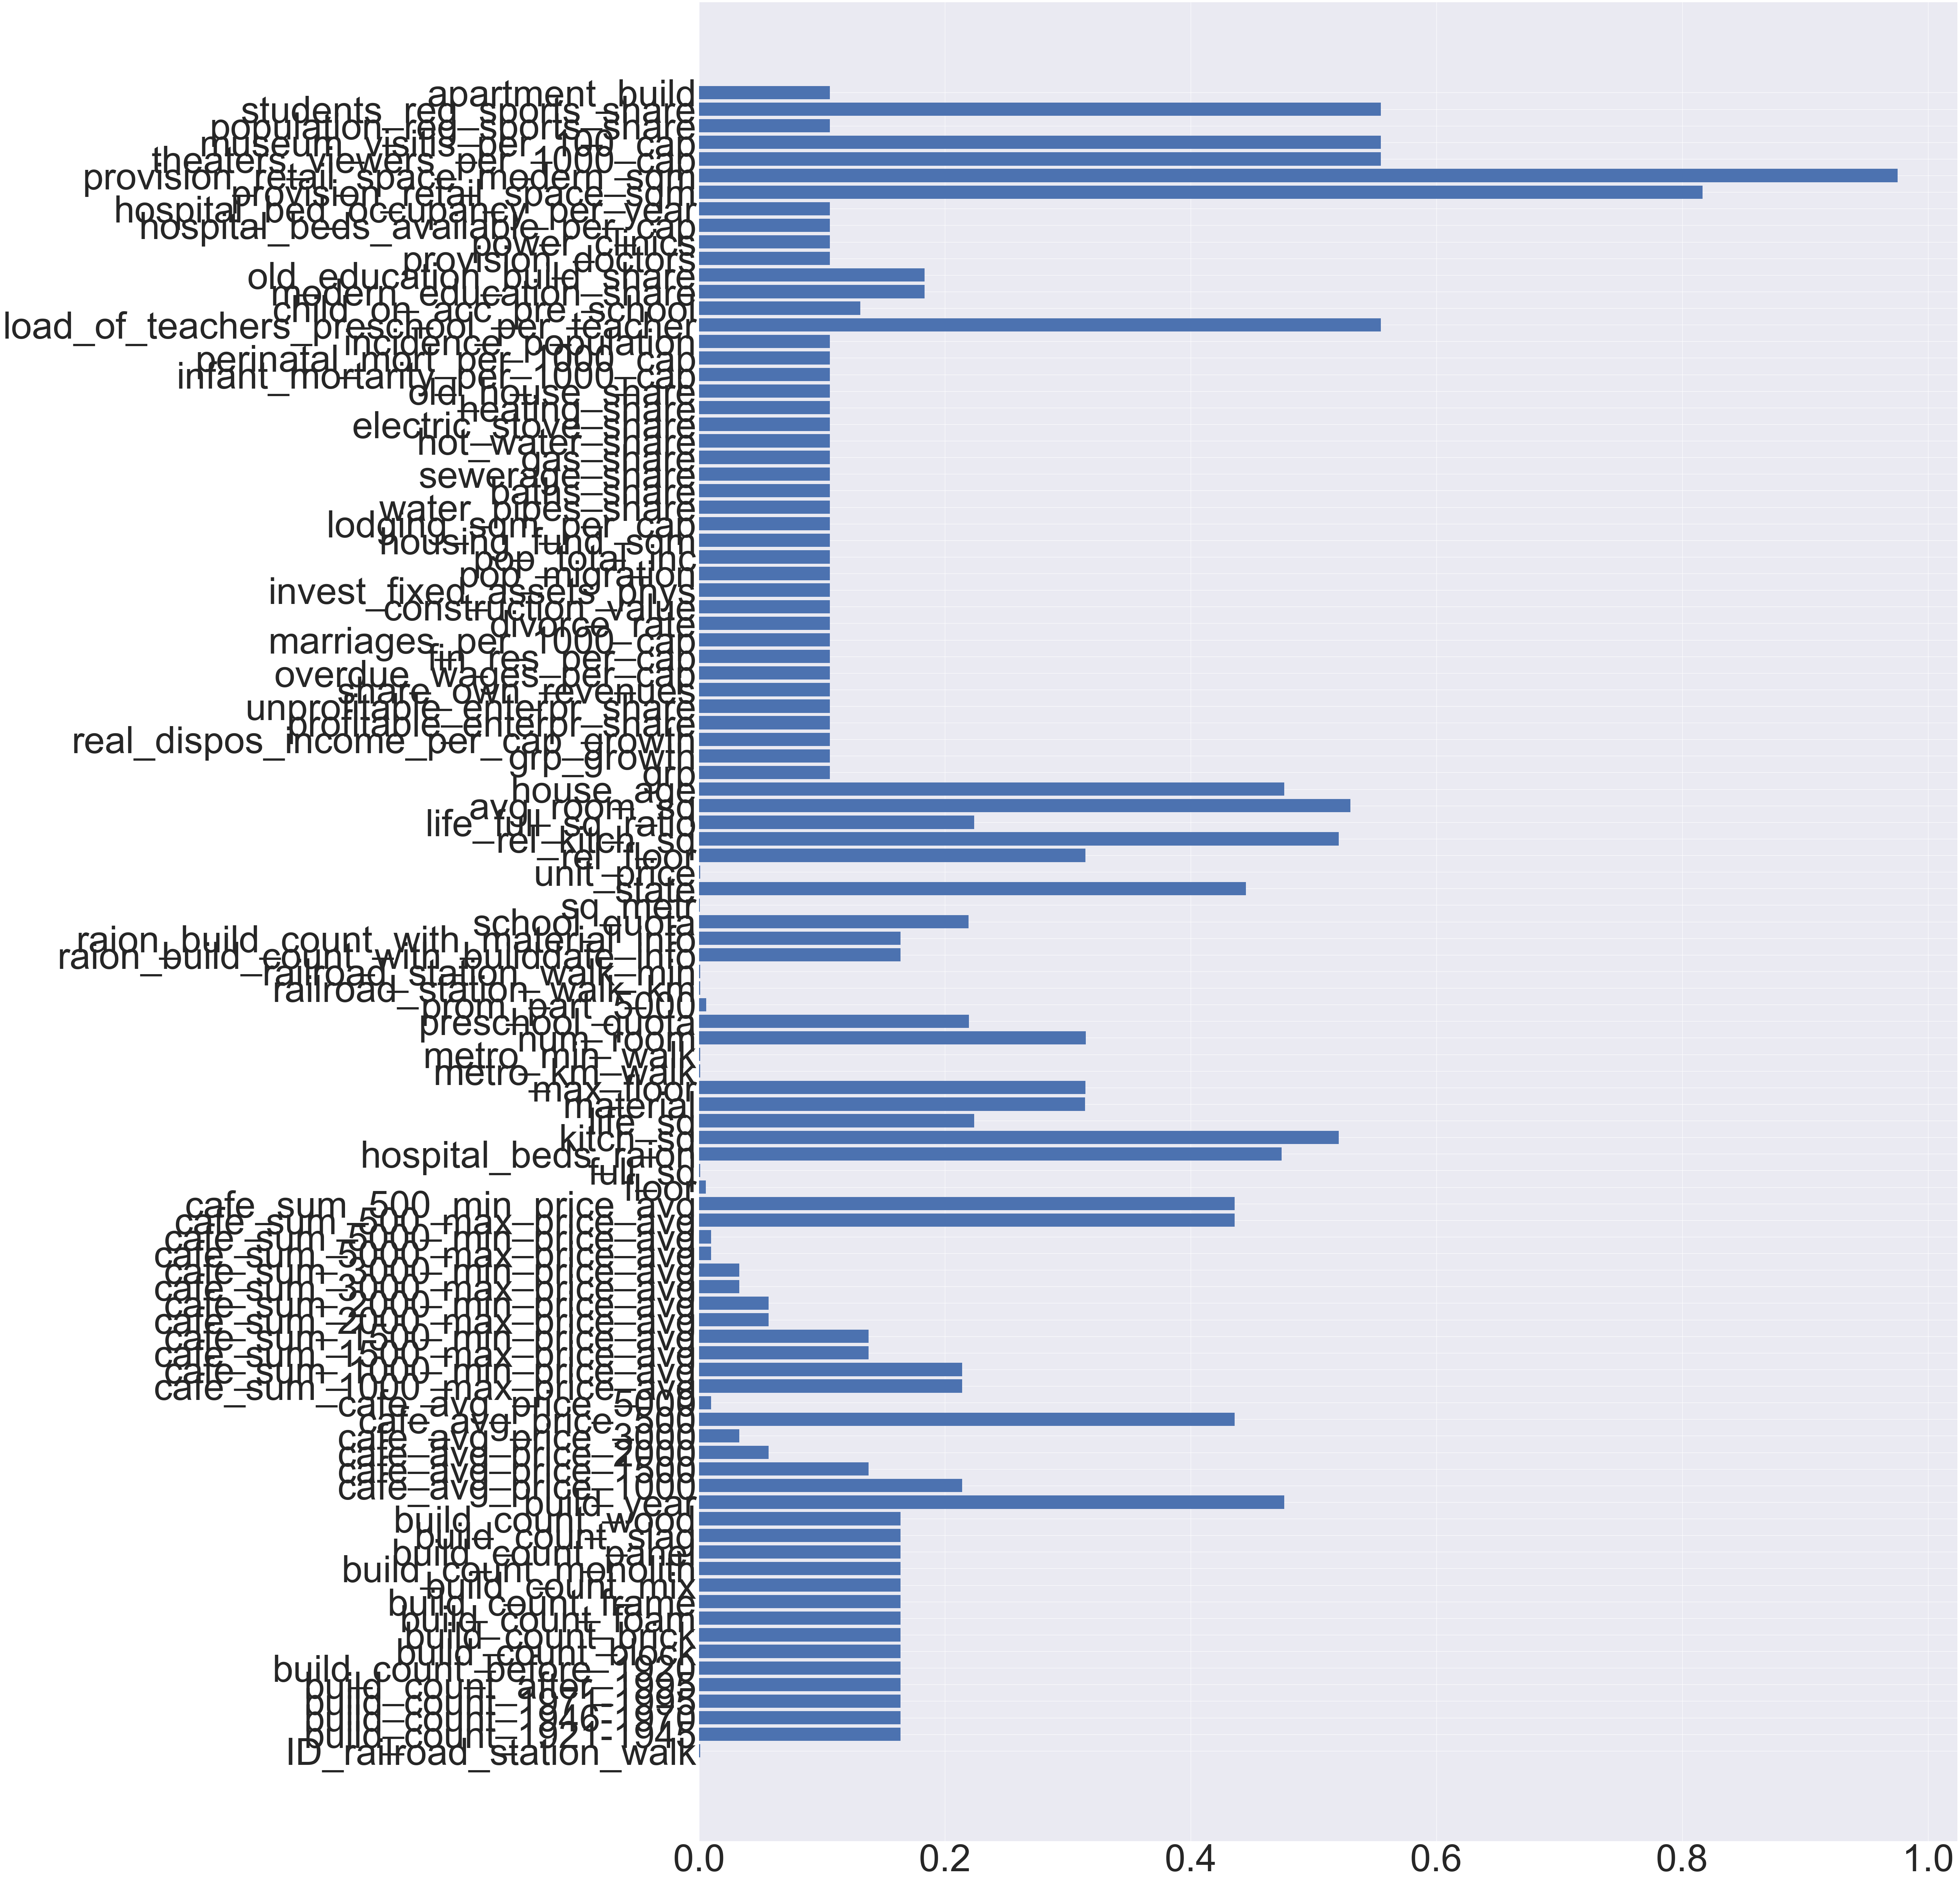

In [17]:
#Ref: http://stackoverflow.com/questions/26266362/how-to-count-the-nan-values-in-the-column-in-panda-data-frame

nan_counts = data.isnull().sum()
nan_ratios = nan_counts / data.shape[0]
nan_ratios.columns = ["Feature", "Ratio NaN"]
nan_ratios = nan_ratios[nan_ratios > 0]
display(nan_ratios.head())

plt.figure(1)
plt.figure(figsize = (60,90))
plt.tick_params(axis='both', which='major', labelsize=100)
ind = np.arange(nan_ratios.count())
plt.yticks(ind, nan_ratios.index)
plt.barh(ind, nan_ratios, align = "center")
plt.show()

In [72]:
#remove unwanted columns and subset the 40 final features

kaggle13 = ['balance_trade','balance_trade_growth','eurrub','average_provision_of_build_contract',\
            'micex_rgbi_tr','micex_cbi_tr','deposits_rate','mortgage_value','mortgage_rate','income_per_cap',\
            'rent_price_4+room_bus','museum_visitis_per_100_cap','apartment_build']
cs_pick = ['oil_rub_shift_153','ppi_shift_90','gdp_quart_shift_136','deposits_rate','mortgage_value','mortgage_growth',\
          'cpi','balance_trade_shift_91','rent_price_4+room_bus','apartment_build']
pick = cs_pick + ['log_price_doc']

train_data_features = data[pick]

train_data_features=train_data_features.rename(columns = {'rent_price_4+room_bus':'rent_price_4room_bus'})
print "Russian housing train_data_features dataset has {} samples with {} features each.".format(*train_data_features.shape)

Russian housing train_data_features dataset has 30471 samples with 11 features each.


In [38]:
print "Display statistics about training data:"
display(train_data_features.describe())

Display statistics about training data:


,balance_trade,balance_trade_growth,eurrub,average_provision_of_build_contract,micex_rgbi_tr,micex_cbi_tr,deposits_rate,mortgage_value,mortgage_rate,income_per_cap,rent_price_4room_bus,museum_visitis_per_100_cap,apartment_build,price_doc
count,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,3.047100e+04,30471.000000,30471.000000,30471.000000,13570.000000,27232.000000,3.047100e+04
mean,17.488725,22.612130,48.759814,6.116616,127.288885,237.868659,6.373824,6.811590e+05,12.532303,55778.022835,163.273194,1382.187988,44910.638807,7.119753e+06
std,2.426106,18.372021,9.412958,0.200937,8.846174,14.060299,2.113760,4.559643e+05,0.652565,13041.480788,20.473868,70.691413,3854.550878,4.742898e+06
min,12.785000,4.600000,38.433700,5.750000,97.860000,195.300000,4.000000,3.860600e+04,11.400000,33194.000000,100.080000,1240.000000,23587.000000,1.000000e+05
25%,15.748000,7.600000,41.593100,5.980000,122.950000,231.240000,5.190000,2.978570e+05,12.220000,47334.000000,149.100000,1309.000000,46080.000000,4.740002e+06
50%,16.954000,16.800000,46.821000,6.070000,128.630000,242.440000,5.540000,6.281630e+05,12.300000,52740.400000,160.690000,1440.000000,46080.000000,6.274411e+06
75%,19.639000,32.900000,50.220000,6.290000,133.470000,246.050000,6.100000,1.029124e+06,12.620000,58779.100000,174.220000,1440.000000,46352.000000,8.300000e+06
max,21.939000,75.800000,84.960500,6.460000,141.650000,282.700000,12.330000,1.753294e+06,14.710000,89252.000000,212.870000,1440.000000,46352.000000,9.512250e+07


museum_visitis_per_100_cap    0.554659
apartment_build               0.106298
dtype: float64

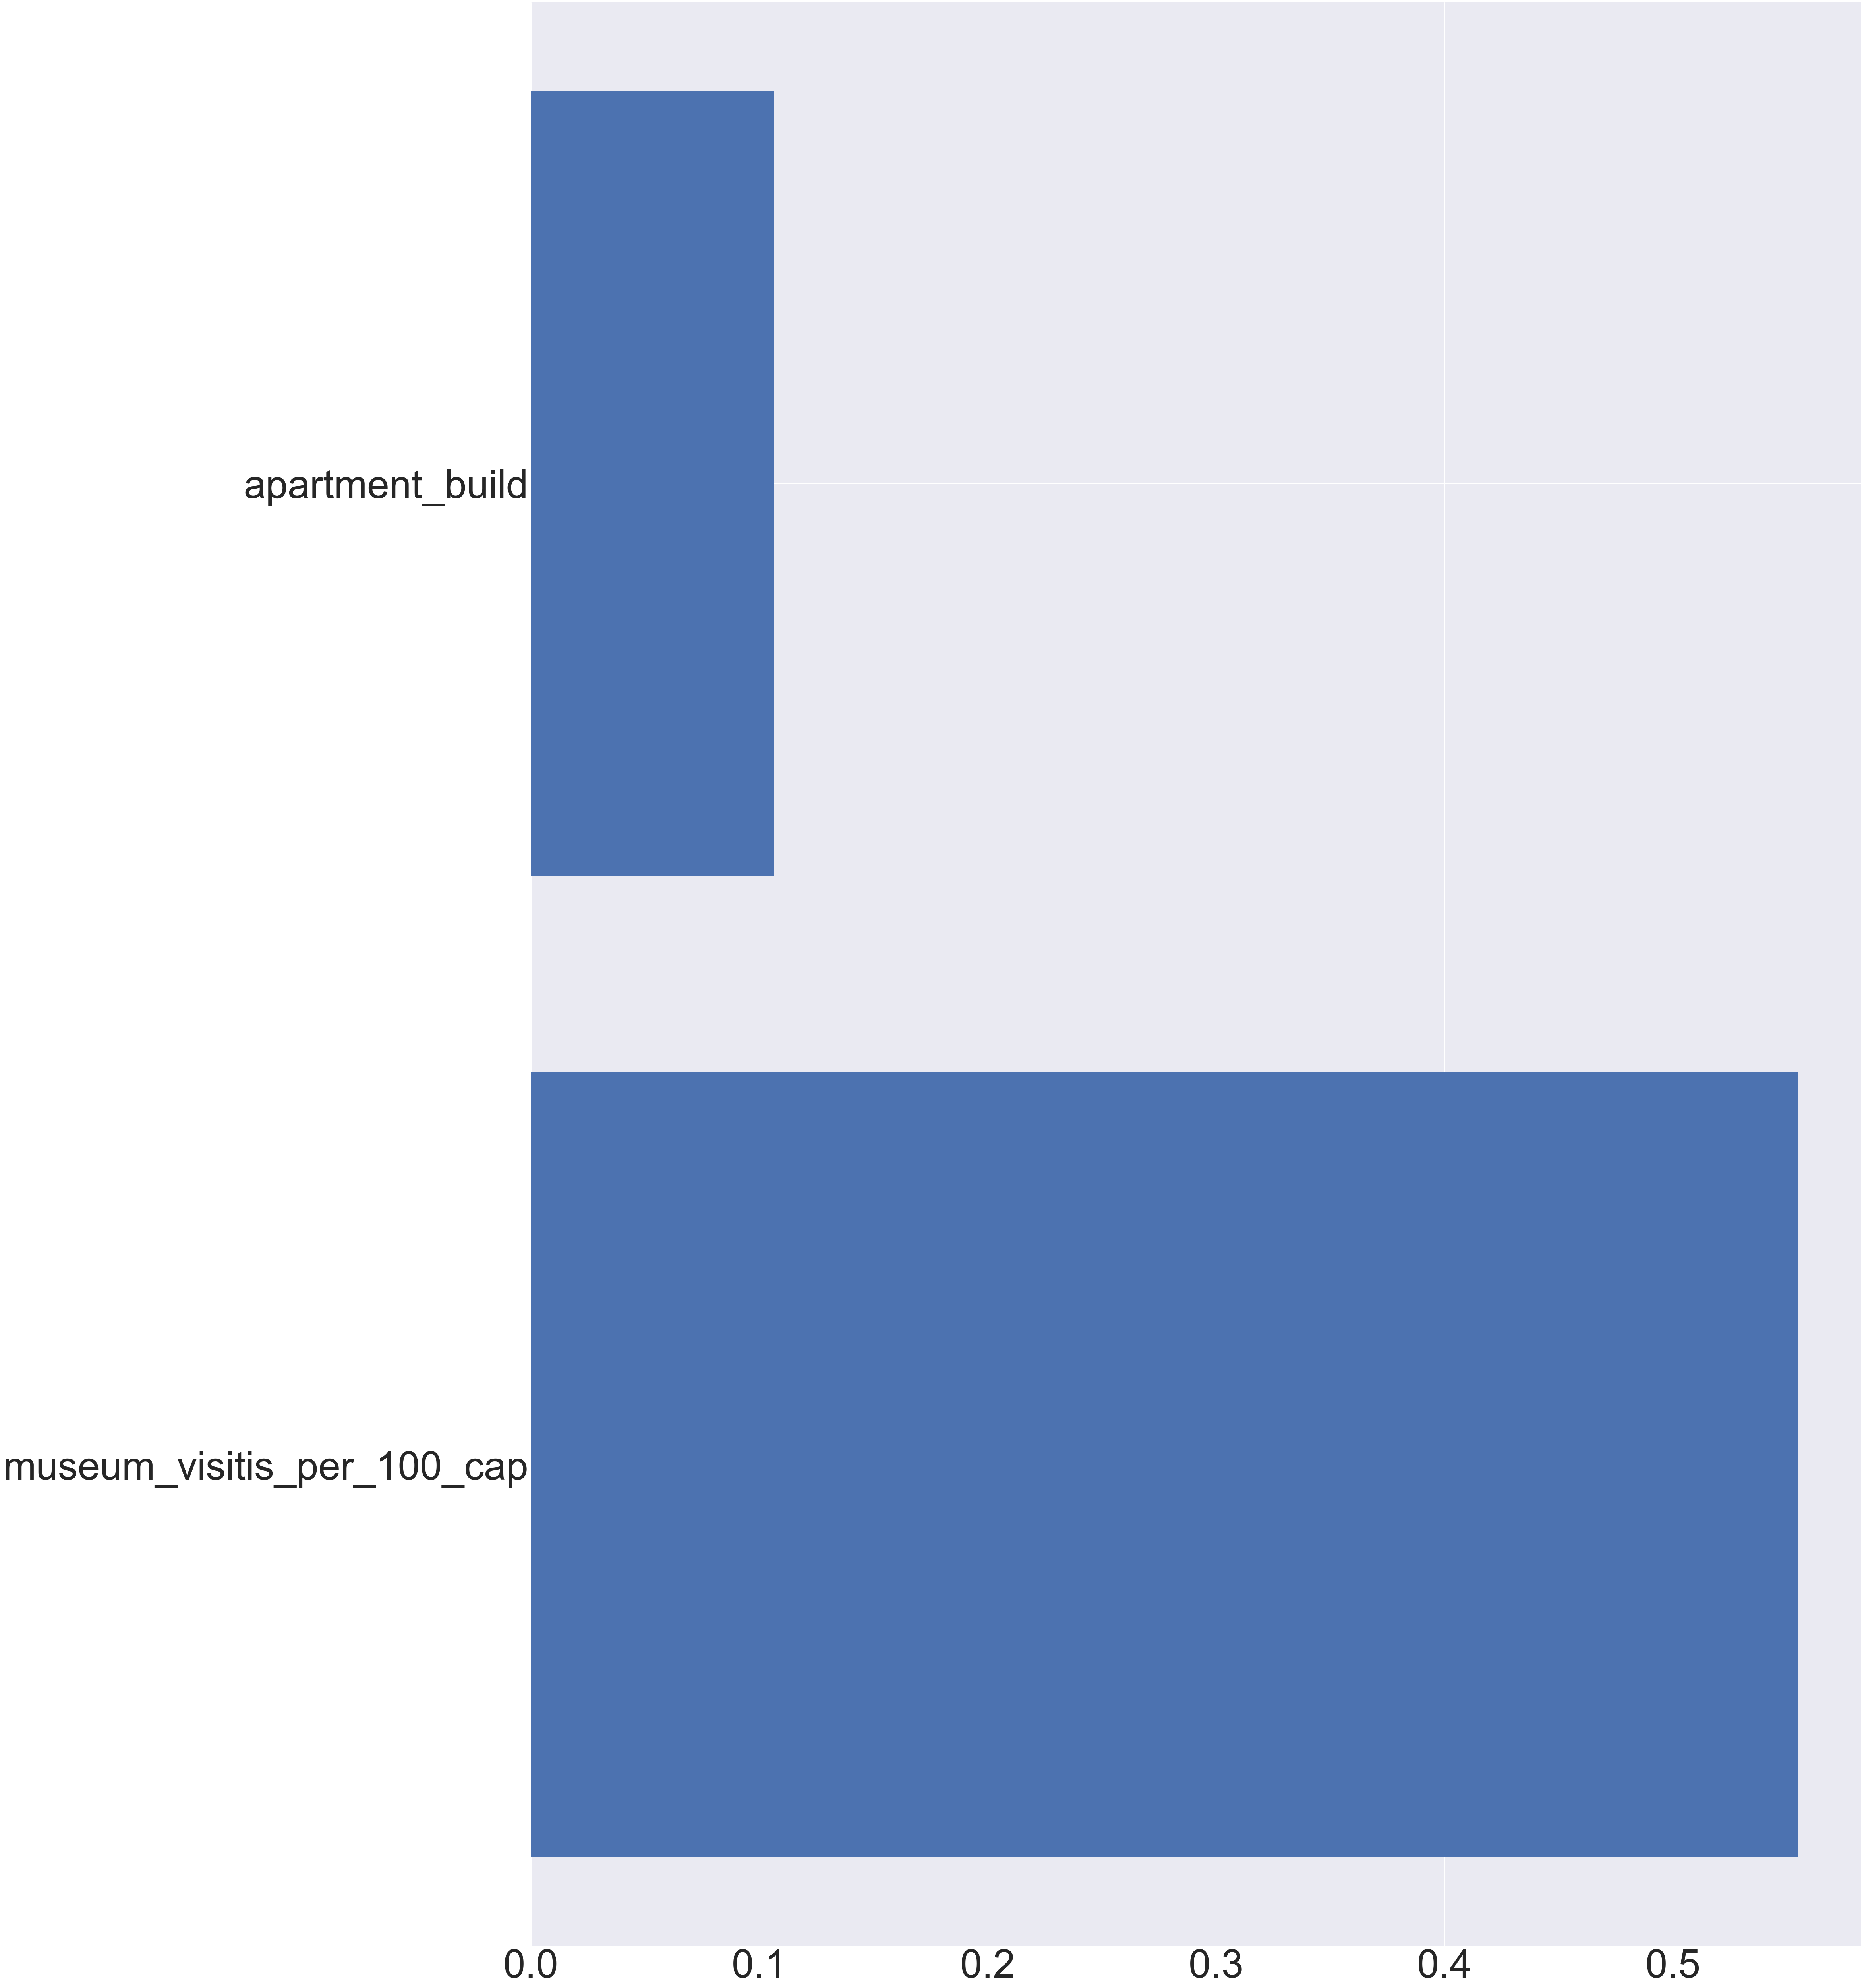

In [39]:
# train_data_features missing value plot

nan_counts = train_data_features.isnull().sum()
nan_ratios = nan_counts / train_data_features.shape[0]
nan_ratios.columns = ["Feature", "Ratio NaN"]
nan_ratios = nan_ratios[nan_ratios > 0]
display(nan_ratios.head())

plt.figure(1)
plt.figure(figsize = (60,90))
plt.tick_params(axis='both', which='major', labelsize=100)
ind = np.arange(nan_ratios.count())
plt.yticks(ind, nan_ratios.index)
plt.barh(ind, nan_ratios, align = "center")
plt.show()

In [40]:
print "Display sample of train_data_features :"
display(train_data_features.head())

Display sample of train_data_features :


,balance_trade,balance_trade_growth,eurrub,average_provision_of_build_contract,micex_rgbi_tr,micex_cbi_tr,deposits_rate,mortgage_value,mortgage_rate,income_per_cap,rent_price_4room_bus,museum_visitis_per_100_cap,apartment_build,price_doc
0,15.459,10.1,41.7681,5.76,131.16,204.78,4.1,323275,11.84,42688.6,136.11,1240.0,23587.0,5850000.0
1,15.459,10.1,41.7537,5.76,131.45,204.92,4.1,323275,11.84,42688.6,136.11,1240.0,23587.0,6000000.0
2,15.459,10.1,41.7114,5.76,131.08,204.84,4.1,323275,11.84,42688.6,136.11,1240.0,23587.0,5700000.0
3,15.386,10.1,41.4014,5.76,131.45,205.42,4.0,386388,11.92,40311.3,155.22,1240.0,23587.0,13100000.0
4,15.386,10.1,41.5902,5.76,131.19,198.24,4.0,386388,11.92,40311.3,155.22,1240.0,23587.0,16331452.0


In [73]:
#impute nans with median 
non_missing = train_data_features.fillna(train_data_features.median())

In [42]:
print "Display sample of non_missing data:"
display(non_missing.head())

Display sample of non_missing data:


,balance_trade,balance_trade_growth,eurrub,average_provision_of_build_contract,micex_rgbi_tr,micex_cbi_tr,deposits_rate,mortgage_value,mortgage_rate,income_per_cap,rent_price_4room_bus,museum_visitis_per_100_cap,apartment_build,price_doc
0,15.459,10.1,41.7681,5.76,131.16,204.78,4.1,323275,11.84,42688.6,136.11,1240.0,23587.0,5850000.0
1,15.459,10.1,41.7537,5.76,131.45,204.92,4.1,323275,11.84,42688.6,136.11,1240.0,23587.0,6000000.0
2,15.459,10.1,41.7114,5.76,131.08,204.84,4.1,323275,11.84,42688.6,136.11,1240.0,23587.0,5700000.0
3,15.386,10.1,41.4014,5.76,131.45,205.42,4.0,386388,11.92,40311.3,155.22,1240.0,23587.0,13100000.0
4,15.386,10.1,41.5902,5.76,131.19,198.24,4.0,386388,11.92,40311.3,155.22,1240.0,23587.0,16331452.0


In [47]:
# forward selection function
import statsmodels.formula.api as smf
def forward_selected(data, response):
    """Linear model designed by forward selection.

    Parameters:
    -----------
    data : pandas DataFrame with all possible predictors and response

    response: string, name of response column in data

    Returns:
    --------
    model: an "optimal" fitted statsmodels linear model
           with an intercept
           selected by forward selection
           evaluated by adjusted R-squared
    """
    remaining = set(data.columns)
    remaining.remove(response)
    selected = []
    current_score, best_new_score = 0.0, 0.0
    while remaining and current_score == best_new_score:
        scores_with_candidates = []
        for candidate in remaining:
            formula = "{} ~ {} + 1".format(response,
                                           ' + '.join(selected + [candidate]))
            res   = smf.ols(formula, data).fit()
#             print res.summary()
            score = res.rsquared_adj
            scores_with_candidates.append((score, candidate))
        scores_with_candidates.sort()
        best_new_score, best_candidate = scores_with_candidates.pop()
        if current_score < best_new_score:
            remaining.remove(best_candidate)
            selected.append(best_candidate)
            current_score = best_new_score
    formula = "{} ~ {} + 1".format(response,
                                   ' + '.join(selected))
    model = smf.ols(formula, data).fit()
    return model

In [33]:
# #forward selection testing

# model = forward_selected(non_missing[['full_sq', 'life_sq','floor','build_year','max_floor','price_doc']], 'price_doc')

# print model.model.formula


# print model.rsquared_adj


price_doc ~ full_sq + build_year + max_floor + floor + life_sq + 1
0.394320773736


In [34]:
# #forward selection testing

# model = forward_selected(non_missing[['full_sq', 'life_sq','floor','build_year','max_floor','month_year_cnt','week_year_cnt'
# ,'kitch_sq','num_room','state','kindergarten_km','price_doc']], 'price_doc')

# print model.model.formula


# print model.rsquared_adj

price_doc ~ full_sq + kindergarten_km + state + kitch_sq + month_year_cnt + build_year + floor + life_sq + week_year_cnt + num_room + 1
0.446237727588


In [74]:
#forward selection testing

model = forward_selected(non_missing, 'log_price_doc')

print model.model.formula


print model.rsquared_adj

log_price_doc ~ cpi + balance_trade_shift_91 + apartment_build + mortgage_growth + rent_price_4room_bus + ppi_shift_90 + deposits_rate + 1
0.0224433606234


In [75]:
print model.summary()

                            OLS Regression Results                            
Dep. Variable:          log_price_doc   R-squared:                       0.023
Model:                            OLS   Adj. R-squared:                  0.022
Method:                 Least Squares   F-statistic:                     100.9
Date:                Sun, 21 May 2017   Prob (F-statistic):          1.43e-146
Time:                        20:38:47   Log-Likelihood:                -27542.
No. Observations:               30471   AIC:                         5.510e+04
Df Residuals:                   30463   BIC:                         5.517e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 14

In [61]:
non_missing.to_csv('non_missing.csv')